In [8]:
import os
from dotenv import load_dotenv

load_dotenv()
os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY')

In [5]:
from typing import TypedDict, Annotated
from langgraph.graph import StateGraph, START, END

# Reducers
from langgraph.graph.message import add_messages

In [7]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [13]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")
llm.invoke("hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_18e61aa3bc', 'id': 'chatcmpl-DCQjbeHT5KjvEumnBoGHsChDBziZf', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c8aca-dda8-79d1-890c-6091c026ae97-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [18]:
from langchain_groq import ChatGroq

llm_groq = ChatGroq(model="qwen/qwen3-32b")
llm_groq.invoke([("system", "you are helpful assistant"), ("user", "Hi, My name is Krish")])

AIMessage(content='<think>\nOkay, the user introduced themselves as Krish. I should acknowledge their introduction and offer assistance. Maybe say "Hi Krish!" and ask how I can help them today. Keep it friendly and open-ended.\n</think>\n\nHi Krish! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 23, 'total_tokens': 80, 'completion_time': 0.118647911, 'completion_tokens_details': None, 'prompt_time': 0.000879935, 'prompt_tokens_details': None, 'queue_time': 0.327799586, 'total_time': 0.119527846}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_d58dbe76cd', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c8ad1-2ee9-7b91-8ba2-efd2a527b229-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 23, 'output_tokens': 57, 'total_tokens': 80})

In [20]:
## Nodes
def superbot(state: State):
    return {"messages": [llm_groq.invoke(state['messages'])]}

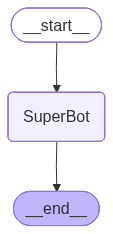

In [29]:
from IPython.display import Image, display
graph = StateGraph(State)

graph.add_node("SuperBot", superbot)

graph.add_edge(START, "SuperBot")
graph.add_edge("SuperBot", END)

graph_builder = graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [30]:
# Invocation
graph_builder.invoke({"messages": "Hi, My name is Krish and I like Cricket."})

{'messages': [HumanMessage(content='Hi, My name is Krish and I like Cricket.', additional_kwargs={}, response_metadata={}, id='2dfc8d94-1115-46ee-a687-9fcfd6f10e37'),
  AIMessage(content="<think>\nOkay, the user is Krish and he mentioned he likes cricket. I need to respond in a friendly and engaging way. Maybe start by acknowledging his introduction. Then, ask him about what he enjoys most about cricket to keep the conversation going. Let me make sure the tone is positive and open-ended so he feels encouraged to share more. Also, avoid any technical terms or jargon. Keep it simple and conversational. Alright, that should work.\n</think>\n\nHi Krish! Nice to meet you! 🏏 Cricket is an awesome sport—so much excitement and strategy. Do you play it, or are you more of a passionate fan? Either way, I'd love to hear what you enjoy most about the game!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 148, 'prompt_tokens': 19, 'total_tokens': 167, 'completion_time

In [ ]:
# Streaming the responses[stream all the messages, HumanMessage & HumanMessage + AIMessage]
for event in graph_builder.stream({"messages": "Hello, my name is Krish"}, stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Hello, my name is Krish', additional_kwargs={}, response_metadata={}, id='59d88abb-8715-4281-abe1-77ecc7cf544c')]}
{'messages': [HumanMessage(content='Hello, my name is Krish', additional_kwargs={}, response_metadata={}, id='59d88abb-8715-4281-abe1-77ecc7cf544c'), AIMessage(content="<think>\nOkay, the user greeted me with Hello, my name is Krish. I need to respond in a friendly and welcoming manner. First, I should acknowledge their introduction and welcome them. Then, offer assistance to show I'm here to help. Keep it simple and conversational. Maybe add an emoji to keep the tone light. Let me make sure there are no errors and that it flows naturally.\n</think>\n\nHello, Krish! 👋 Nice to meet you! How can I assist you today? Whether you have a question, need help with something, or just want to chat, I'm here for you. 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 127, 'prompt_tokens': 14, 'total_tokens': 141, 'com

In [ ]:
# Streaming the responses[only the latest last message, AIMessage]
for event in graph_builder.stream({"messages": "Hello, my name is Krish"}, stream_mode="updates"):
    print(event)

{'SuperBot': {'messages': [AIMessage(content="<think>\nOkay, the user introduced himself as Krish. I should respond politely and get him to continue the conversation. First, I need to greet him and acknowledge his introduction. Maybe I can ask him how I can help or what he wants to talk about. Keep it friendly and open-ended. Don't use too complex words, keep the tone natural. Make sure to encourage him to share more.\n\nLet me put it all together: Greet Krish, express willingness to help, ask how I can assist. That should be concise and effective.\n</think>\n\nHello Krish! Nice to meet you. How can I assist you today? Feel free to ask me any questions or let me know if you need help with anything specific! 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 148, 'prompt_tokens': 14, 'total_tokens': 162, 'completion_time': 0.366731847, 'completion_tokens_details': None, 'prompt_time': 0.000367394, 'prompt_tokens_details': None, 'queue_time': 0.047393716, '